# Description

This project focuses on the critical challenge of predicting food delivery times for services such as Zomato and Swiggy, aiming to enhance operational efficiency and customer satisfaction. It involves developing a sophisticated predictive model that leverages historical data on delivery durations and incorporates the distances between pickup and delivery points. By analyzing patterns in how delivery times have varied with distance in the past, the model provides accurate delivery time estimations. This not only helps in setting realistic expectations for customers but also enables delivery services to optimize their delivery processes, reduce wait times, and improve overall service quality. The core of this project lies in its data-driven approach to solving a common yet complex problem faced by food delivery platforms, making it a valuable tool for businesses looking to streamline their delivery operations.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print("All of the libraries loaded")

D:\AppData\Local\Temp\ipykernel_19536\448716454.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


All of the libraries loaded


# Loading Datasets

In [2]:
path = r'D:\Data_Projects\Food_Delivery_Time_Prediction\Src\data\Delivery-time\deliverytime.txt'
data = pd.read_csv(path)

In [3]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


## Columns Information

ID: order ID number 

Delivery_person_ID: ID number of the delivery partner

Delivery_person_Age: Age of the delivery partner

Delivery_person_Ratings: ratings of the delivery partner based on past deliveries

Restaurant_latitude: The latitude of the restaurant

Restaurant_longitude: The longitude of the restaurant

Delivery_location_latitude: The latitude of the delivery location

Delivery_location_longitude: The longitude of the delivery location

Type_of_order: The type of meal ordered by the customer

Type_of_vehicle: The type of vehicle delivery partner rides

Time_taken(min): The time taken by the delivery partner to complete the order

# Data Cleaning

Here, I want to manage the columns names , all of them with lower letter 

In [5]:
data.columns = data.columns.str.lower()

Checking Missing values 

In [6]:
data.isnull().sum()

id                             0
delivery_person_id             0
delivery_person_age            0
delivery_person_ratings        0
restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
type_of_order                  0
type_of_vehicle                0
time_taken(min)                0
dtype: int64

Cheching Duplicated values 

In [7]:
data.duplicated().sum()

0

In this case, There are no Missing and Duplicated values , Thank god :)

Now, I need to check the type of the columns 

In [8]:
num_columns = []
cat_columns = []

for col in data.columns:
    if data[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

print(f"Numerical columns : {num_columns}")
print(f"Categorical columns : {cat_columns}")        

Numerical columns : ['delivery_person_age', 'delivery_person_ratings', 'restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'time_taken(min)']
Categorical columns : ['id', 'delivery_person_id', 'type_of_order', 'type_of_vehicle']


In [24]:
# Informations About type_of_order column
data.type_of_order.value_counts()

type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64

In [23]:
# Informations About type_of_vehicle column
data.type_of_vehicle.value_counts()

type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64

In [50]:
# Information about Delivery ratings unique
np.sort(data.delivery_person_ratings.unique())

array([1. , 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 6. ])

In [52]:
np.sort(data.delivery_person_age.unique())

array([15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 50], dtype=int64)

# General Information 

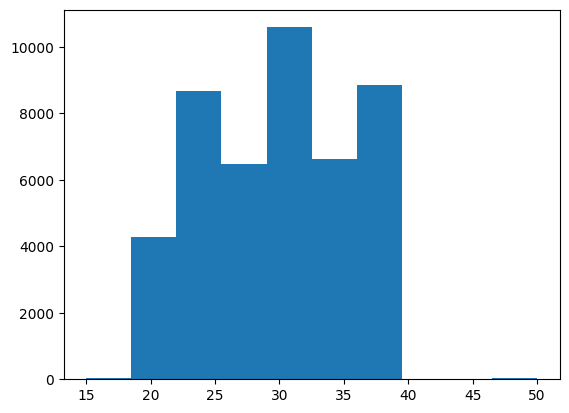

In [10]:
# Ploting age of the delivery portners distribution 

plt.hist(data['delivery_person_age'],bins=10)
plt.show()

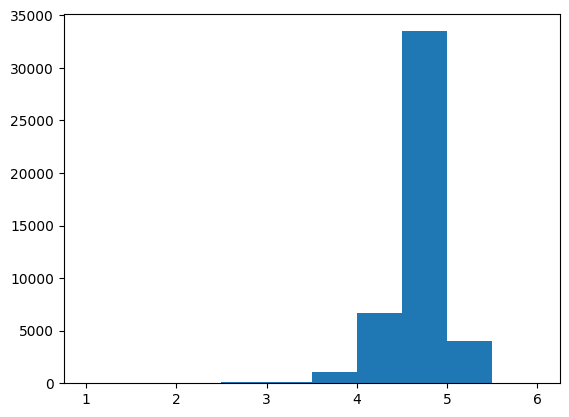

In [12]:
# Ploting rate of the delivery portners distribution 

plt.hist(data['delivery_person_ratings'],bins=10)
plt.show()

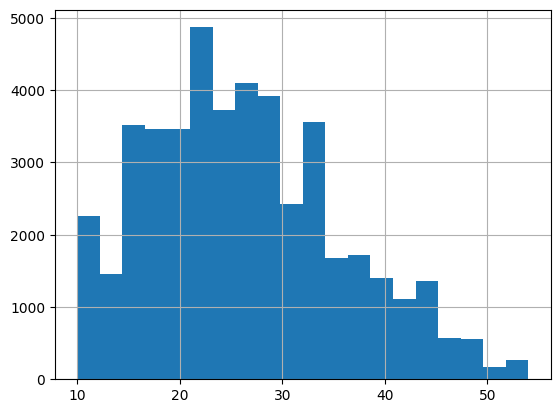

In [18]:
# Ploting Time taken distribution 

plt.hist(data['time_taken(min)'],bins=20)
plt.grid(True)
plt.show()

In [31]:
data.groupby(data['type_of_vehicle'])['type_of_order'].value_counts()

type_of_vehicle    type_of_order
bicycle            Meal               23
                   Drinks             16
                   Buffet             15
                   Snack              14
electric_scooter   Snack             974
                   Drinks            949
                   Meal              948
                   Buffet            943
motorcycle         Meal             6657
                   Snack            6651
                   Buffet           6595
                   Drinks           6532
scooter            Snack            3894
                   Meal             3830
                   Drinks           3825
                   Buffet           3727
Name: count, dtype: int64

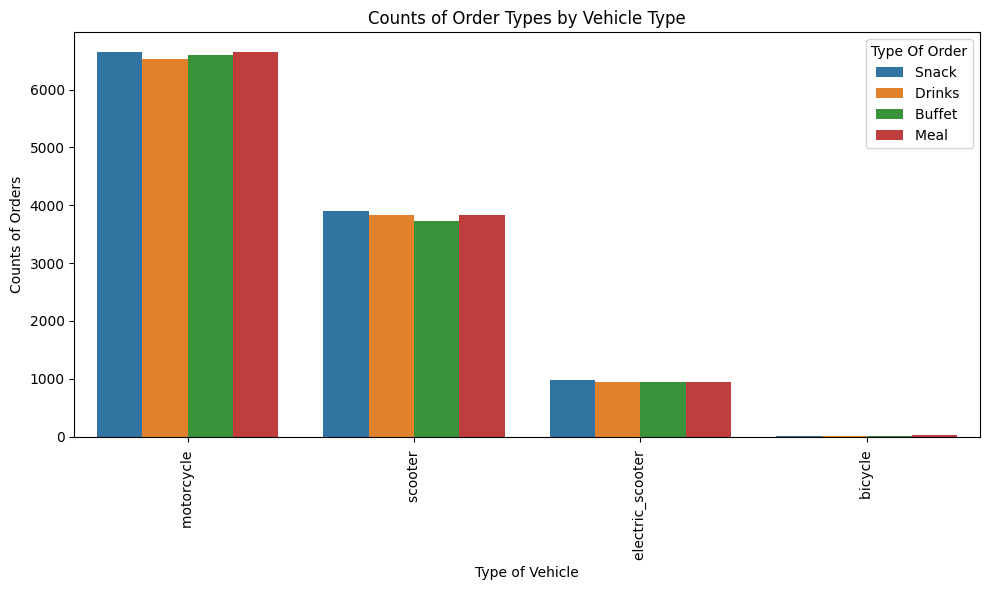

In [33]:
# Ploting how many of orders deliver by which vehicle

plt.figure(figsize=(10,6))
sns.countplot(data=data, x='type_of_vehicle', hue='type_of_order')
plt.title('Counts of Order Types by Vehicle Type')
plt.xlabel('Type of Vehicle')
plt.ylabel('Counts of Orders')
plt.xticks(rotation=90)
plt.legend(title= 'Type Of Order')
plt.tight_layout()
plt.show()

In [32]:
data.groupby(data['type_of_order'])['type_of_vehicle'].value_counts()

type_of_order  type_of_vehicle  
Buffet         motorcycle           6595
               scooter              3727
               electric_scooter      943
               bicycle                15
Drinks         motorcycle           6532
               scooter              3825
               electric_scooter      949
               bicycle                16
Meal           motorcycle           6657
               scooter              3830
               electric_scooter      948
               bicycle                23
Snack          motorcycle           6651
               scooter              3894
               electric_scooter      974
               bicycle                14
Name: count, dtype: int64

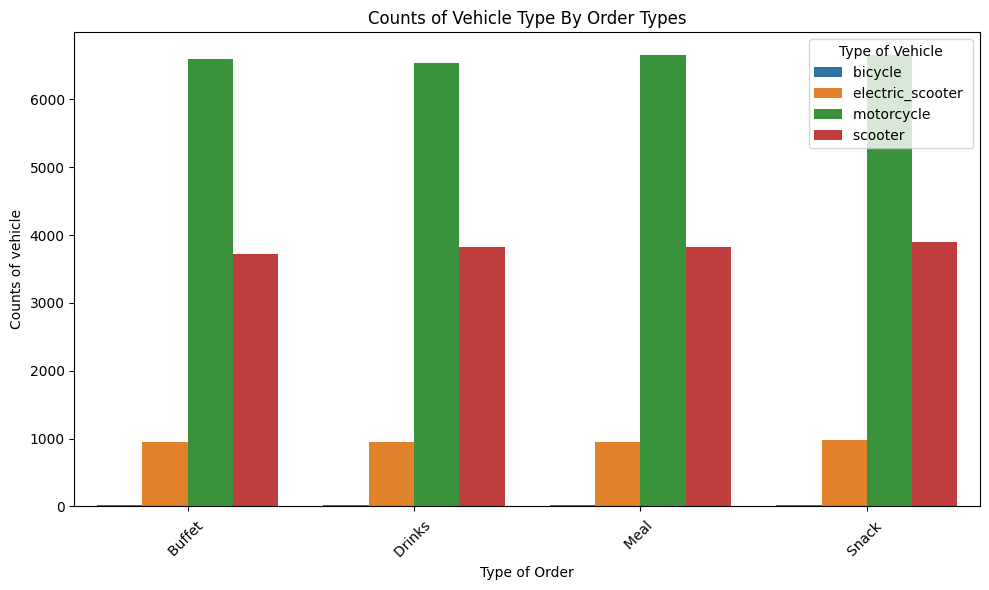

In [37]:
# Transform the groupby result into a DataFrame suitable for Seaborn
grouped_oerder_vehicle = data.groupby(['type_of_order', 'type_of_vehicle']).size().reset_index(name='counts')

# Create a bar plot
plt.figure(figsize=(10, 6)) 
sns.barplot(data=grouped_oerder_vehicle, x='type_of_order', y='counts', hue='type_of_vehicle')
plt.title('Counts of Vehicle Type By Order Types')
plt.xlabel('Type of Order')
plt.ylabel('Counts of vehicle')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.legend(title='Type of Vehicle')
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

In [42]:
grouped_age_rate = data.groupby(['delivery_person_age','delivery_person_ratings']).size().reset_index(name='counts')
data.groupby(data['delivery_person_ratings'])['delivery_person_age'].value_counts()

delivery_person_ratings  delivery_person_age
1.0                      15                      38
2.5                      23                       4
                         29                       4
                         21                       3
                         20                       2
                                               ... 
5.0                      30                     189
                         32                     176
                         38                     174
                         31                     171
6.0                      50                      53
Name: count, Length: 426, dtype: int64

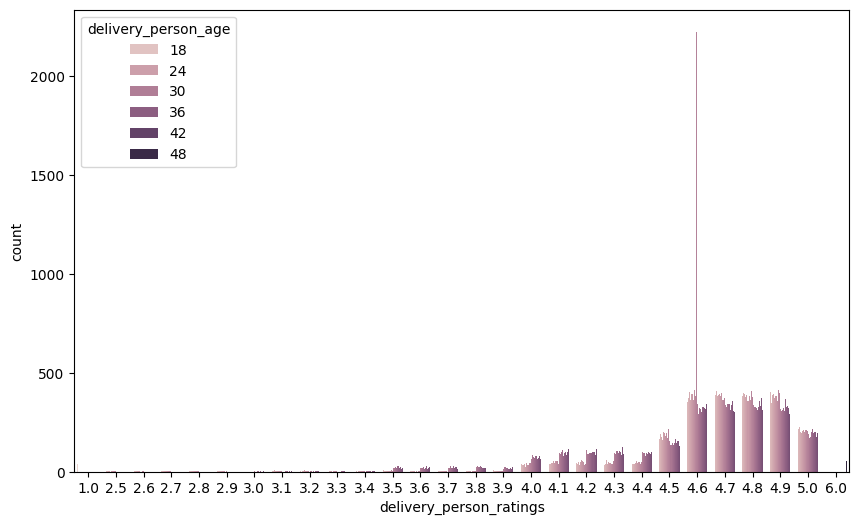

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='delivery_person_ratings', hue='delivery_person_age')
plt.show()

Here, I figureed out I have outlier rate (6) , Generaly there has been rate between (0,5)

In [45]:
data[data['delivery_person_ratings'] > 5]

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,time_taken(min)
3586,46D,BANGRES05DEL01,50,6.0,-12.970324,-77.645748,13.010324,77.685748,Meal,electric_scooter,25
4714,493,HYDRES17DEL01,50,6.0,-17.451976,-78.385883,17.561976,78.495883,Snack,bicycle,27
5169,4F2,JAPRES08DEL01,50,6.0,-26.910262,-75.783013,27.020262,75.893013,Drinks,scooter,20
5362,430,BANGRES19DEL01,50,6.0,12.914264,77.678400,13.024264,77.788400,Meal,electric_scooter,18
5651,BEF 1.00,AGRRES13DEL02,50,6.0,-27.159795,-78.042990,27.209795,78.092990,Drinks,scooter,20
6394,427,JAPRES06DEL02,50,6.0,26.911927,75.797282,27.041927,75.927282,Meal,electric_scooter,20
7031,3EB,MYSRES15DEL02,50,6.0,-12.352058,-76.606650,12.372058,76.626650,Buffet,scooter,14
7681,D42,VADRES09DEL01,50,6.0,0.000000,0.000000,0.010000,0.010000,Meal,bicycle,22
9499,3F0,BANGRES010DEL01,50,6.0,12.933298,77.614293,13.003298,77.684293,Drinks,scooter,17
9535,3EF,RANCHIRES13DEL01,50,6.0,-23.374989,-85.335486,23.444989,85.405486,Snack,bicycle,32


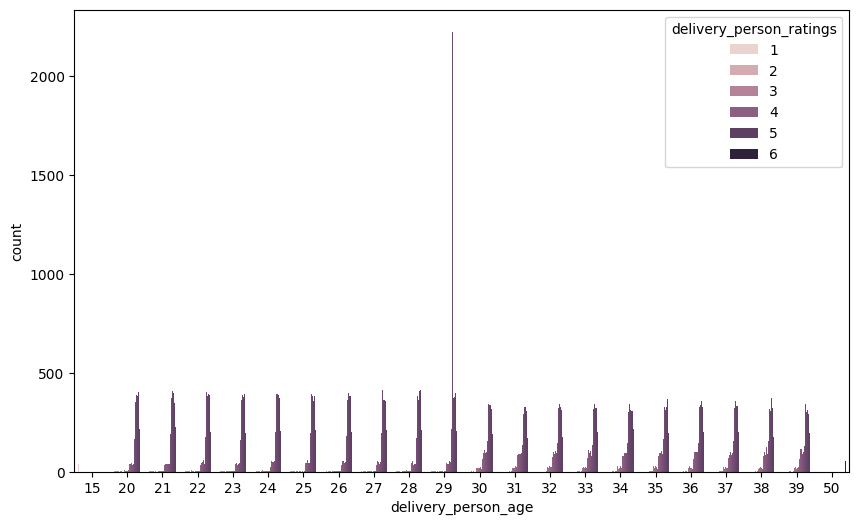

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='delivery_person_age', hue='delivery_person_ratings')
plt.show()

Here snippet calculates the distance between two points on the Earth, specified by their latitude and longitude coordinates, using the **Haversine** formula. The calculation is done in Python, and it's applied to a dataset to compute distances between pairs of points (from a restaurant to a delivery location).

In [59]:
# Set the earth's radius (in kilometers)
R = 6371

# Formula: radians = degrees * (π / 180)
# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    # lat1, lon1 are the latitude and longitude of the first point (e.g., a restaurant)
    d_lat = deg_to_rad(lat2-lat1)
    #  lat2, lon2 are the latitude and longitude of the second point (e.g., a delivery location).
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
    # The Haversine formula is then applied:
    # a calculates the square of half the chord length between the points.
    # c calculates the angular distance in radians.
    # The distance d is then found by multiplying c by the Earth's radius, R.
    # Returns the distance in kilometers between the two points.

# Calculate the distance between each pair of points
data['distance'] = np.nan
# data['distance'] = np.nan: Initializes a new column in the data DataFrame to store the calculated distances

# The loop iterates over each row in the data DataFrame:
# For each row, it calculates the distance between the restaurant's location (Restaurant_latitude, Restaurant_longitude) 
# and the delivery location (Delivery_location_latitude, Delivery_location_longitude) using the distcalculate function.

for i in range(len(data)):
    data.loc[i, 'distance'] = distcalculate(data.loc[i, 'restaurant_latitude'], 
                                        data.loc[i, 'restaurant_longitude'], 
                                        data.loc[i, 'delivery_location_latitude'], 
                                        data.loc[i, 'delivery_location_longitude'])

I have now calculated the distance between the restaurant and the delivery location. 

I have also added a new feature in the dataset as distance.

In [60]:
data.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138
